In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression# Compare Algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from numpy import set_printoptions
set_printoptions(precision=3)

In [2]:
Data = pd.read_excel("Gen.xlsx",sheet_name="data").dropna(how = "any")
Data['Generator 1capacity (KVA)'] = Data['Generator 1capacity (KVA)'].astype("category")
Data = Data.dropna(how = 'any')

In [3]:
Data['consumption_perDay_within_a_period'] = Data['Consumption HIS']/(Data['NBRE DE JOUR'])
Data.loc[~np.isfinite(Data['consumption_perDay_within_a_period']), 'consumption_perDay_within_a_period'] = 0
Data['Quanitity_consumed_btn_visits'] = Data['QTE FUEL PRECEDENTE'] - Data['QTE FUEL TROUVEE']
set_printoptions(precision=3)

In [4]:
#lb_make = LabelEncoder()
#Data["Gen_capacityCode"] = lb_make.fit_transform(Data["Generator 1capacity (KVA)"])
#lab_enc = preprocessing.LabelEncoder()
#y = lab_enc.fit_transform(Data['Consumption HIS'])
#Data[["Generator 1capacity (KVA)", "Gen_capacityCode"]]
Data.head(3)
#Data1 = pd.get_dummies(Data['Cluster'],prefix=['Cluster'], drop_first=True)

,Cluster,Site Name,DATE EFFECTIVE DE LA VISITE,DATE DE VISITE PRECEDENTE,Months,NBRE DE JOUR,Generator 1capacity (KVA),COMPTEUR HORAIRE ACTUEL GE1,ANCIEN COMPTEUR HORAIRE G1,QTE FUEL PRECEDENTE,QTE FUEL TROUVEE,QTE FUEL AJOUTEE,QTE TOTALE LAISSEE,Consumption HIS,Class,NBRE HEURES DE FONCTIONNEMENT DG1,CONSOMMATION HORAIRE DE FUEL DG1,Power Type,consumption_perDay_within_a_period,Quanitity_consumed_btn_visits
0,KOUSSERI,FIGUIL [ T0157 ],2017-09-26,2017-09-20,September,6,22.0,21136,20996,461.0,111.0,375.0,486.0,420.0,-1,140.0,3.0,Gen Only,70.0,350.0
1,GUIDER,DEMBO [ T1408 ],2017-09-26,2017-09-22,September,4,22.0,2522,2424,685.0,440.0,0.0,440.0,254.8,-1,98.0,2.6,Gen Only,63.7,245.0
2,GAROUA 1,BANGANA [ T2901 ],2017-09-26,2017-09-21,September,5,9.0,13284,13165,495.0,280.0,200.0,480.0,238.0,-1,119.0,2.0,Gen Only,47.6,215.0


In [5]:
Data.drop(['Power Type'],axis=1, inplace=True)
Data.drop(['ANCIEN COMPTEUR HORAIRE G1'],axis=1, inplace=True)
Data.drop(['Class'],axis=1, inplace=True)
Data.drop(['DATE  EFFECTIVE DE LA VISITE'],axis=1, inplace=True)
Data.drop(['DATE DE VISITE PRECEDENTE'],axis=1, inplace=True)

Data.drop(['Months'],axis=1, inplace=True)
Data.drop(['Cluster'],axis=1, inplace=True)
Data.drop(['Site Name'],axis=1, inplace=True)
Data.drop(['Generator 1capacity (KVA)'],axis=1, inplace=True)

Data.drop(['COMPTEUR HORAIRE ACTUEL GE1'],axis=1, inplace=True)
Data.drop(['QTE FUEL AJOUTEE'],axis=1, inplace=True)


In [6]:

Data['Running time per day'] = Data["NBRE HEURES DE FONCTIONNEMENT DG1"]/Data["NBRE DE JOUR"]             
Data.loc[~np.isfinite(Data['Running time per day']), 'Running time per day'] = 0
set_printoptions(precision=3)

In [7]:
Data['Maximum_consumption_perDay'] = Data[['CONSOMMATION HORAIRE DE FUEL DG1']]*24
set_printoptions(precision=3)

maximum consumption in one day
fuel consumed per period difference netween the fuel found and previously left
comparison of the difference with running time.
Generator running for more than 24 hourse in a day


In [8]:
a = list(Data['NBRE HEURES DE FONCTIONNEMENT DG1'])
b = list(Data['Quanitity_consumed_btn_visits'])

In [9]:
c = []
for i in range(len(a)):
    if a[i] == 0  and  b[i]!=0:
        c.append(0)
    else:
        c.append(1)

In [10]:
t = list(Data['Maximum_consumption_perDay'])
r = list (Data['consumption_perDay_within_a_period'])

In [11]:
z = []
for i in range(len(r)):
    if r[i] > t[i]:
        z.append(0)
    else:
        z.append(1)

In [12]:
p = []
for i in range(len(z)):
    if c[i]==1 and z[i]==1:
        p.append(1)
    else:
        p.append(0)     

In [13]:
Data['Class'] = p


In [14]:
Data.drop(['QTE TOTALE LAISSEE'],axis=1, inplace=True)
#Data.drop(['Consumption HIS'],axis=1, inplace=True)
Data.drop(['Maximum_consumption_perDay'],axis=1, inplace=True)
Data.drop(['QTE FUEL PRECEDENTE'],axis=1, inplace=True)
Data.drop(['QTE FUEL TROUVEE'],axis=1, inplace=True)
#Data.drop(['NBRE HEURES DE FONCTIONNEMENT DG1'],axis=1, inplace=True)
#Data.drop(['CONSOMMATION HORAIRE DE FUEL DG1'],axis=1, inplace=True)
Data.drop(['NBRE DE JOUR'],axis=1, inplace=True)
#Data.drop(['consumption_perDay_within_a_period'],axis=1, inplace=True)
Data.drop(['Quanitity_consumed_btn_visits'],axis=1, inplace=True)
#Data.drop(['Maximum_consumption_perDay'],axis=1, inplace=True)
#Data.drop(['consumption_perDay_within_a_period'],axis=1, inplace=True)

In [16]:
Data.drop(['Consumption HIS'],axis=1, inplace=True)
Data.drop(['NBRE HEURES DE FONCTIONNEMENT DG1'],axis=1, inplace=True)
Data.drop(['CONSOMMATION HORAIRE DE FUEL DG1'],axis=1, inplace=True)

In [17]:
Data.columns

Index(['consumption_perDay_within_a_period', 'Running time per day', 'Class'], dtype='object')

In [19]:
x = Data.loc[:,Data.columns.tolist()[0:2]]
x = x.as_matrix()
Y = Data.loc[:,'Class']
Y = Y.as_matrix()
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size=0.33,random_state=7)

print(x.shape)
print(Y.shape)
print(x_test.shape)
print( x_train.shape)
print( y_test.shape)
print(y_train.shape)

(2676, 2)
(2676,)
(884, 2)
(1792, 2)
(884,)
(1792,)


/usr/lib/python3/dist-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/usr/lib/python3/dist-packages/ipykernel/__main__.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


/usr/lib/python3/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


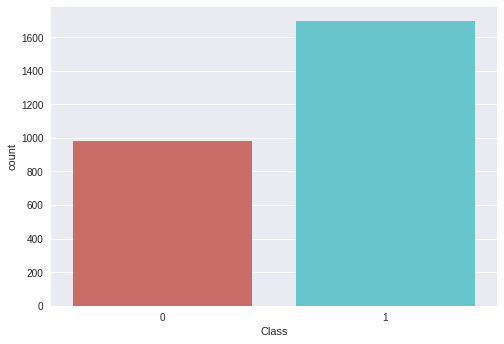

In [20]:
sns.countplot(x='Class',data=Data, palette='hls')
plt.show()

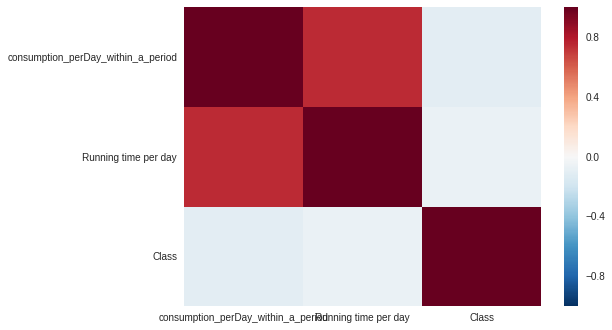

In [36]:
sns.heatmap(Data.corr())
plt.show()

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
array = Data.values
X = array[:,0:2]
Y = array[:,2]
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
classifier = LogisticRegression(random_state=0)
results = cross_val_score(classifier, X, Y, cv=kfold)
results
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 63.636% (2.675%)


In [35]:
LR.features.importance_

AttributeError: 'LogisticRegression' object has no attribute 'features'

In [29]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(x_test, y_test)))

ValueError: Found input variables with inconsistent numbers of samples: [1792, 2007]

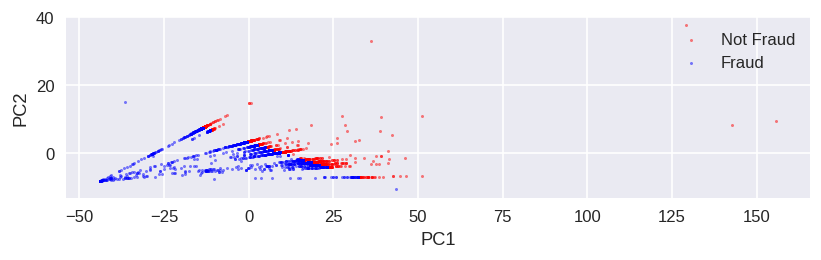

In [26]:
from sklearn.decomposition import PCA
X = Data.iloc[:,0:2]
y = Data.iloc[:,2]
pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='Not Fraud', s=2, color='red')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='Fraud', s=2, color='blue')
plt.legend()
plt.title('')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

In [21]:
# FUNCTION FOR TRAINING THE MODEL
def trainmodel(model):
    model.fit(x_train,y_train)
# FUNCTION TO MAKE PREDICTIONS

def predictmodel(model):
    y_pred = model.predict(x_test)
    f,t,thresholds = metrics.roc_curve(y_test,y_pred)
    cm = metrics.confusion_matrix(y_test,y_pred)
    print("Score:", metrics.auc(f,t))
    print("Classification report:")
    print(metrics.classification_report(y_test,y_pred))
    print("Confusion Matrix:")
    print(cm)
def predictmodeln(model):
    y_pred = model.predict_classes(x_test)
    f,t,thresholds = metrics.roc_curve(y_test,y_pred)
    cm = metrics.confusion_matrix(y_test,y_pred)
    print("Score:", metrics.auc(f,t))
    print("Classification report:")
    print(metrics.classification_report(y_test,y_pred))
    print("Confusion Matrix:")
    print(cm)


In [ ]:
C_param_range = [0.001,0.01,0.1,1,10,100]
LR = LogisticRegression(C= 0.1, solver='',random_state = 0)
LR.fit(x_train , y_train)
predictmodel(LR)

In [35]:
LR = LogisticRegression(C= 1, random_state = 0)
LR.fit(x_train , y_train)
predictmodel(LR)

Score: 0.5536515550054155
Classification report:
             precision    recall  f1-score   support

          0       0.76      0.13      0.22       322
          1       0.66      0.98      0.79       562

avg / total       0.70      0.67      0.58       884

Confusion Matrix:
[[ 42 280]
 [ 13 549]]


In [30]:
LR = LogisticRegression(C = 0.0001, random_state = 0)
LR.fit(x_train , y_train)
predictmodel(LR)


Score: 0.5050452023606906
Classification report:
             precision    recall  f1-score   support

          0       0.41      0.05      0.09       322
          1       0.64      0.96      0.77       562

avg / total       0.56      0.63      0.52       884

Confusion Matrix:
[[ 17 305]
 [ 24 538]]


In [46]:
LR = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
LR.fit(x_train , y_train)
predictmodel(LR)

Score: 0.5536515550054155
Classification report:
             precision    recall  f1-score   support

          0       0.76      0.13      0.22       322
          1       0.66      0.98      0.79       562

avg / total       0.70      0.67      0.58       884

Confusion Matrix:
[[ 42 280]
 [ 13 549]]


In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
array = Data.values
X = array[:,0:2]
Y = array[:,2]
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

results = cross_val_score(LR, X, Y, cv=kfold)
results
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

ValueError: Logistic Regression supports only liblinear, newton-cg, lbfgs and sag solvers, got 

In [31]:
Data.corr()

,consumption_perDay_within_a_period,Running time per day,Class
consumption_perDay_within_a_period,1.000000,0.745880,-0.106108
Running time per day,0.745880,1.000000,-0.069683
Class,-0.106108,-0.069683,1.000000
